## Exploring Cleaning and Wrangling Part 02
### this is starting from new data which includes games played info Sourced from SullyGnome.com


In [1]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

In [2]:
# imports
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install plotly

!{sys.executable} -m pip install collections
!{sys.executable} -m pip install xgboost

from collections import namedtuple
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [3]:
### This works but I should create a function that reads in the data.  

In [4]:
# twitch_df = pd.read_csv("twitch_clean_data_Kelly.csv", parse_dates=["Date"])
# twitch_df.head()

In [5]:
pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', 130)

In [6]:
def load_twitch_data():
    cols = list(pd.read_csv("twitch_clean_data_Kelly02.csv", nrows=1))
    df = pd.read_csv("twitch_clean_data_Kelly02.csv", parse_dates=["Date"],
                    usecols = [i for i in cols if i !="Unnamed: 71"])
    return df

In [7]:
twitch_original_df = load_twitch_data()


In [8]:
twitch_original_df.head()

,Date,player_mode,DST,ONI,Go_Deeper,Chatting,Stardew,DD,Ori_Blind_Forest,Manual_Samuel,Divinity_II,Drawful2,Running_Rifles,Cat_Quest,Cuphead,Hotline_Miami,Terraria,DS,Getting_Over_It,Golf_w_Friends,Escapists2,Human_Fall_Flat,Castle_Crashers,Bridge_Constructor_Portal,Choice_Chamber,KTANE,Doki_Doki,GeoGuessr,Jackbox,We_Were_Here_Too,Stick_Fight,Hacktag,Into_Breach,Portia,Act_it_OutXL,Little Nightmares,Dauntless,Domina,ToS,Surviving_Mars,Way_Out,Move_Die,Hollow_Knight,Spy_Party,Monster_Prom,Shantae_Pirates_Curse,Subnautica,Use_Your_Words,Witch_It,Im_Bread,Agario,Moonlighter,Ultimate_Chicken_Horse,Spelunky,Overcooked2,Graveyard_Keeper,DBD,Amnesia_Dark_Descent,Layers_of_Fear,Borderlands2,Rapture_Rejects,Undertale,Into_the_Breach,Marbles,Tabletop_Sim,2Point_Hospital,Yokus_Island,Slime_Rancher,Secret_Neighbor,Hotline_Miami.1,Cook_Serve_Delicious2,Time_Portia,Griftlands,Stream_Raiders,Yomawari,Darkwood,7D2D,Dream_Daddy,ARK,Stream_Racer,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
0,2017-06-13,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1,0.033333,12.66666667,66.66666667
1,2017-06-14,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2,0.066667,10,34.61538462
2,2017-06-15,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.45,40,3,0,0,2,0.0,1,8,89,20,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,3,0.100000,40,300
3,2017-06-16,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.73,38,5,0,0,2,0.0,17,6,421,115,13,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,4,0.133333,2.923076923,38.46153846
4,2017-06-17,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.99,100,8,0,0,0,0.0,16,7,591,148,12,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,5,0.166667,8.333333333,66.66666667


In [9]:
twitch_df = twitch_original_df.copy()

### Ultimately I need to make a decision about how to split this data.

I think since her followers grow over time, I think the model should be given a random range of dates

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(twitch_df, minimal=True).to_notebook_iframe()

profile

## Wrangle - 
    Date as index 
    Create new streamDateId using David's toordinal
    replace_list = ["inf", "Unknown"]
    twitch_df.fillna(value= 0)

In [11]:
def wrangle_twitch_data02(df):
    # fill the Nans
    df = df.fillna(value= 0)
    
    # replace the unknown game values with 0
    replace_list = ["inf", "Unknown"]
    df= df.replace(to_replace=replace_list, value=0)    
    
    # as a consequence of having strings the columns where not floats.
    # correct that.
    df["user_chatting_percent"]= df["user_chatting_percent"].astype(str).astype(float)
    df["avg_message_per_viewer"]= df["avg_message_per_viewer"].astype(str).astype(float)
    
    ## Create new streamDateId using David's toordinal
    # this basically ordinally encodes the date
    df["stream_date_id"] = df["Date"].map(datetime.datetime.toordinal)
    
    # Set the date to index I think.. not sure if it's necessary...
    # df = df.set_index("Date")
    
    # Create an other_column for dimension reduction
    df["other_game"] = [0 for x in range(0, 1159)]

    # Fill in other_game column
    bottom_games_streamed=df.loc[:, "DST":"Stream_Racer"].sum().sort_values(ascending=False).tail(58).index
    bottom_games_streamed
    
    concerned_columns_df = df[bottom_games_streamed]
    other_sum = []
    for i in range(len(concerned_columns_df)):
        row = concerned_columns_df.iloc[i]
        other_sum.append(row.sum())
        
    df["other_game"] = other_sum

    # drop the bottom_games_streamed
    df = df.drop(bottom_games_streamed, axis=1)
    
    # rearrange column order
    cols = df.columns.tolist()

    cols = ['Date','stream_date_id', 'player_mode', 'DST','ONI','Chatting',
     'Stardew', 'DD','Drawful2', 'Cuphead','Terraria','Escapists2', 'Choice_Chamber',
     'Jackbox', 'Hollow_Knight','Subnautica','Use_Your_Words','Moonlighter','Graveyard_Keeper',
     'Marbles','7D2D','Dream_Daddy','ARK',"other_game",'Average Viewers','Chat Messages',
     'Chatters','Clip Views','Clips Created','Follows','Hosts and Raids Viewers (%)',
     'Live Views','Max Viewers','Minutes Watched','Minutes Streamed','Unique Viewers',
     'day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','day_of_week_5',
    'day_of_week_6','day_of_week_7','streak','activity','avg_message_per_viewer',
     'user_chatting_percent','Sub Revenue','Prime Revenue','Gifted Subs Revenue',
     'Bits Revenue','Ad Revenue','Extensions Revenue','Bounties Revenue','donations',
     'Prime Subs','Total Paid Subs','Tier 1 subs','Tier 2 subs', 'Tier 3 subs',
     'Total Gifted Subs','Gifted Tier 1 subs','Gifted Tier 2 subs', 'Gifted Tier 3 subs',
     'Total_Sub_Revenue','Total_Earnings']
    
    df =df[cols]

    # create earning_cat_target
    df["total_earn_cat"] = pd.qcut(df["Total_Earnings"], 3, labels=["not worth", "kinda worth", "def worth!"])
    
    # change these columns from cat to numerical
    df["Extensions Revenue"]= df["Extensions Revenue"].astype(str).astype(float)  
    df["Bounties Revenue"]= df["Bounties Revenue"].astype(str).astype(float)
    df["Tier 2 subs"]= df["Tier 2 subs"].astype(str).astype(float)
    df["player_mode"]= df["player_mode"].astype(str).astype(float)

    return df
    
    

In [12]:
twitch_df.head(2)

,Date,player_mode,DST,ONI,Go_Deeper,Chatting,Stardew,DD,Ori_Blind_Forest,Manual_Samuel,Divinity_II,Drawful2,Running_Rifles,Cat_Quest,Cuphead,Hotline_Miami,Terraria,DS,Getting_Over_It,Golf_w_Friends,Escapists2,Human_Fall_Flat,Castle_Crashers,Bridge_Constructor_Portal,Choice_Chamber,KTANE,Doki_Doki,GeoGuessr,Jackbox,We_Were_Here_Too,Stick_Fight,Hacktag,Into_Breach,Portia,Act_it_OutXL,Little Nightmares,Dauntless,Domina,ToS,Surviving_Mars,Way_Out,Move_Die,Hollow_Knight,Spy_Party,Monster_Prom,Shantae_Pirates_Curse,Subnautica,Use_Your_Words,Witch_It,Im_Bread,Agario,Moonlighter,Ultimate_Chicken_Horse,Spelunky,Overcooked2,Graveyard_Keeper,DBD,Amnesia_Dark_Descent,Layers_of_Fear,Borderlands2,Rapture_Rejects,Undertale,Into_the_Breach,Marbles,Tabletop_Sim,2Point_Hospital,Yokus_Island,Slime_Rancher,Secret_Neighbor,Hotline_Miami.1,Cook_Serve_Delicious2,Time_Portia,Griftlands,Stream_Raiders,Yomawari,Darkwood,7D2D,Dream_Daddy,ARK,Stream_Racer,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
0,2017-06-13,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1,0.033333,12.66666667,66.66666667
1,2017-06-14,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2,0.066667,10,34.61538462


In [13]:
twitch_df.isnull().sum()

Date                              0
player_mode                     460
DST                             839
ONI                            1151
Go_Deeper                      1156
Chatting                        995
Stardew                        1080
DD                             1132
Ori_Blind_Forest               1158
Manual_Samuel                  1158
Divinity_II                    1158
Drawful2                       1042
Running_Rifles                 1158
Cat_Quest                      1156
Cuphead                        1139
Hotline_Miami                  1158
Terraria                       1152
DS                             1158
Getting_Over_It                1155
Golf_w_Friends                 1158
Escapists2                     1153
Human_Fall_Flat                1156
Castle_Crashers                1157
Bridge_Constructor_Portal      1158
Choice_Chamber                 1148
KTANE                          1157
Doki_Doki                      1157
GeoGuessr                   

In [14]:
twitch_df = wrangle_twitch_data02(twitch_df)
twitch_df.head()

,Date,stream_date_id,player_mode,DST,ONI,Chatting,Stardew,DD,Drawful2,Cuphead,Terraria,Escapists2,Choice_Chamber,Jackbox,Hollow_Knight,Subnautica,Use_Your_Words,Moonlighter,Graveyard_Keeper,Marbles,7D2D,Dream_Daddy,ARK,other_game,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,streak,activity,avg_message_per_viewer,user_chatting_percent,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,donations,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,Total_Sub_Revenue,Total_Earnings,total_earn_cat
0,2017-06-13,736493,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0,0,0,0,0,1,0,1,0.033333,12.666667,66.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
1,2017-06-14,736494,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0,0,0,0,0,0,1,2,0.066667,10.000000,34.615385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
2,2017-06-15,736495,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.45,40,3,0,0,2,0.0,1,8,89,20,1,1,0,0,0,0,0,0,3,0.100000,40.000000,300.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
3,2017-06-16,736496,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.73,38,5,0,0,2,0.0,17,6,421,115,13,0,1,0,0,0,0,0,4,0.133333,2.923077,38.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
4,2017-06-17,736497,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.99,100,8,0,0,0,0.0,16,7,591,148,12,0,0,1,0,0,0,0,5,0.166667,8.333333,66.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth


In [15]:
twitch_df.columns


Index(['Date', 'stream_date_id', 'player_mode', 'DST', 'ONI', 'Chatting',
       'Stardew', 'DD', 'Drawful2', 'Cuphead', 'Terraria', 'Escapists2',
       'Choice_Chamber', 'Jackbox', 'Hollow_Knight', 'Subnautica',
       'Use_Your_Words', 'Moonlighter', 'Graveyard_Keeper', 'Marbles', '7D2D',
       'Dream_Daddy', 'ARK', 'other_game', 'Average Viewers', 'Chat Messages',
       'Chatters', 'Clip Views', 'Clips Created', 'Follows',
       'Hosts and Raids Viewers (%)', 'Live Views', 'Max Viewers',
       'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'Sub Revenue',
       'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue', 'Ad Revenue',
       'Extensions Revenue', 'Bounties Revenue', 'donations', 'Prime Subs',
       'Total Paid Subs', 'Tier 1 subs', 'Tier 2 subs',

In [16]:
twitch_df.isnull().sum()

Date                           0
stream_date_id                 0
player_mode                    0
DST                            0
ONI                            0
Chatting                       0
Stardew                        0
DD                             0
Drawful2                       0
Cuphead                        0
Terraria                       0
Escapists2                     0
Choice_Chamber                 0
Jackbox                        0
Hollow_Knight                  0
Subnautica                     0
Use_Your_Words                 0
Moonlighter                    0
Graveyard_Keeper               0
Marbles                        0
7D2D                           0
Dream_Daddy                    0
ARK                            0
other_game                     0
Average Viewers                0
Chat Messages                  0
Chatters                       0
Clip Views                     0
Clips Created                  0
Follows                        0
Hosts and 

In [17]:
twitch_df.shape

(1159, 67)

## Revenue per month on Main Channel

In [18]:
(twitch_df["Total_Earnings"].sum()/1159)*30

587.9244434857636

In [19]:
# Affiliate monthy wage according to CreatorHype.com
affiliate_monthly_df = pd.DataFrame({"Low End Affiliate": [12], "Median Affiliate": [319],
                                 "Stake Holder Status": [588], "High End Affiliate": [2701]})
affiliate_monthly_df

,Low End Affiliate,Median Affiliate,Stake Holder Status,High End Affiliate
0,12,319,588,2701


<ipython-input-20-1ca8f6739db9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=affiliate_monthly_df.columns, fontsize=13, color= "#454545")
<ipython-input-20-1ca8f6739db9>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=[0,"$500", "$1000","$1500","$2000", "$2500", "$3000"], fontsize=17, color= "#454545")


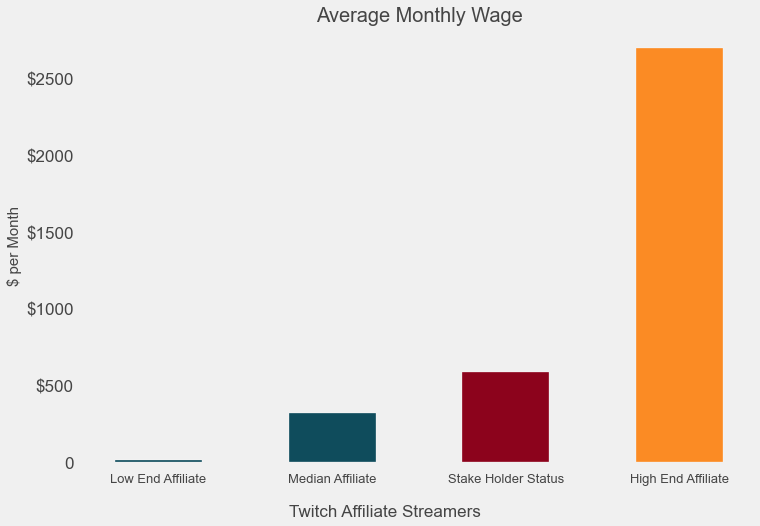

In [20]:

fig, ax = plt.subplots(figsize = (12,8))

# Set bg 

fig.set_facecolor("#F0F0F0")

# set graph background 

ax.set_facecolor("#F0F0F0")


# set label axis
plt.ylabel("$ per Month",fontsize=15, color= "#454545")


ax.set_xticklabels(labels=affiliate_monthly_df.columns, fontsize=13, color= "#454545")
ax.set_yticklabels(labels=[0,"$500", "$1000","$1500","$2000", "$2500", "$3000"], fontsize=17, color= "#454545")

# make graph 
plt.bar(x=affiliate_monthly_df.columns, height=affiliate_monthly_df.loc[0,:], width=.5,
        color= ["#0f4c5c","#0f4c5c", "#8C031C", "#fb8b24",])



# set title
plt.title('Average Monthly Wage', fontsize=20, color= "#454545")

# Subtitle
subtitle_ = "Twitch Affiliate Streamers"
ax.text(s=subtitle_ ,fontsize=17, color= "#454545",
           x = .75, y= -350)

#remove spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('bar_chart_twitch_affiliate_average_monthly_wage_comparison.png')
plt.show()

In [21]:
# This is how many times a game was streamed.  I should plot this.  
twitch_df.loc[:, "DST":"other_game"].sum().sort_values(ascending=False)

DST                 320.0
Jackbox             205.0
Chatting            164.0
other_game          122.0
Drawful2            117.0
Stardew              79.0
7D2D                 58.0
DD                   27.0
Subnautica           24.0
Hollow_Knight        21.0
Cuphead              20.0
ARK                  15.0
Graveyard_Keeper     13.0
Use_Your_Words       12.0
Choice_Chamber       11.0
Marbles               8.0
ONI                   8.0
Terraria              7.0
Escapists2            6.0
Moonlighter           6.0
Dream_Daddy           6.0
dtype: float64

In [22]:
# turn this into a list so I can zip and turn into a df
game_columns = list(twitch_df.loc[:, "DST":"other_game"].columns)

In [23]:
game_columns

['DST',
 'ONI',
 'Chatting',
 'Stardew',
 'DD',
 'Drawful2',
 'Cuphead',
 'Terraria',
 'Escapists2',
 'Choice_Chamber',
 'Jackbox',
 'Hollow_Knight',
 'Subnautica',
 'Use_Your_Words',
 'Moonlighter',
 'Graveyard_Keeper',
 'Marbles',
 '7D2D',
 'Dream_Daddy',
 'ARK',
 'other_game']

In [24]:
g_data = list(twitch_df.loc[:, "DST":"other_game"].sum())
g_data

[320.0,
 8.0,
 164.0,
 79.0,
 27.0,
 117.0,
 20.0,
 7.0,
 6.0,
 11.0,
 205.0,
 21.0,
 24.0,
 12.0,
 6.0,
 13.0,
 8.0,
 58.0,
 6.0,
 15.0,
 122.0]

In [25]:
game_count_tuple = list(zip(game_columns, g_data))

In [26]:
game_count_tuple

[('DST', 320.0),
 ('ONI', 8.0),
 ('Chatting', 164.0),
 ('Stardew', 79.0),
 ('DD', 27.0),
 ('Drawful2', 117.0),
 ('Cuphead', 20.0),
 ('Terraria', 7.0),
 ('Escapists2', 6.0),
 ('Choice_Chamber', 11.0),
 ('Jackbox', 205.0),
 ('Hollow_Knight', 21.0),
 ('Subnautica', 24.0),
 ('Use_Your_Words', 12.0),
 ('Moonlighter', 6.0),
 ('Graveyard_Keeper', 13.0),
 ('Marbles', 8.0),
 ('7D2D', 58.0),
 ('Dream_Daddy', 6.0),
 ('ARK', 15.0),
 ('other_game', 122.0)]

In [27]:
game_freq_df = pd.DataFrame(game_count_tuple, columns=["Game", "Days"])

In [28]:
game_freq_df.shape

(21, 2)

<AxesSubplot:ylabel='Game'>

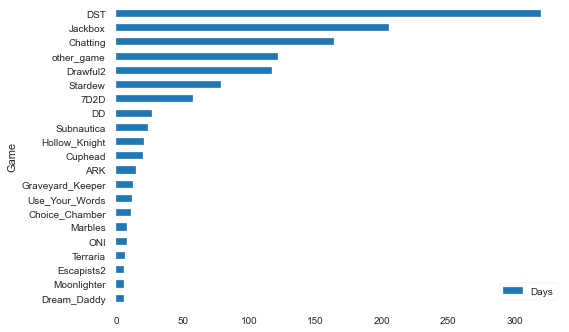

In [29]:
game_freq_df.set_index("Game").head(21).sort_values(by="Days").plot.barh()

In [30]:
# I should change all other games to other.

In [31]:
twitch_df.head(2)

,Date,stream_date_id,player_mode,DST,ONI,Chatting,Stardew,DD,Drawful2,Cuphead,Terraria,Escapists2,Choice_Chamber,Jackbox,Hollow_Knight,Subnautica,Use_Your_Words,Moonlighter,Graveyard_Keeper,Marbles,7D2D,Dream_Daddy,ARK,other_game,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,streak,activity,avg_message_per_viewer,user_chatting_percent,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,donations,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,Total_Sub_Revenue,Total_Earnings,total_earn_cat
0,2017-06-13,736493,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0,0,0,0,0,1,0,1,0.033333,12.666667,66.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth
1,2017-06-14,736494,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0,0,0,0,0,0,1,2,0.066667,10.000000,34.615385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,not worth


In [32]:
# create a list of columns that are not in the top 20 played games
# bottom_games_streamed=twitch_df.loc[:, "DST":"Stream_Racer"].sum().sort_values(ascending=False).tail(58).index
# bottom_games_streamed

In [33]:
# # 
# other_sum = []
# for row, value in twitch_df.loc[:, bottom_games_streamed]: # I think problem is here
#     curr_sum =value.sum()  ## <---- I'm stuck here
#     other_sum.append(curr_sum)
# other_sum

In [34]:
# row_list = [sum(list(x)) for x in twitch_df.loc[:, bottom_games_streamed]]

In [35]:

# other_sum = []
# for index, row in twitch_df.loc[:, bottom_games_streamed].iterrows(): 
#     curr_sum = row.sum()
#     other_sum.append(curr_sum)
# other_sum

In [36]:
# concerned_columns_df = twitch_df[bottom_games_streamed]
# other_sum = []
# for i in range(len(concerned_columns_df)):
#     row = concerned_columns_df.iloc[i]
#     other_sum.append(row.sum())

In [37]:
# bottom_games_streamed=twitch_df.loc[:, "DST":"Stream_Racer"].sum().sort_values(ascending=False).tail(58).index
# bottom_games_streamed

In [38]:
# last one - create earnings_cat
twitch_df["Total_Earnings"].describe()

count    1159.000000
mean       19.597481
std        54.431782
min         0.000000
25%         0.127750
50%         4.590000
75%        14.645000
max       672.210000
Name: Total_Earnings, dtype: float64

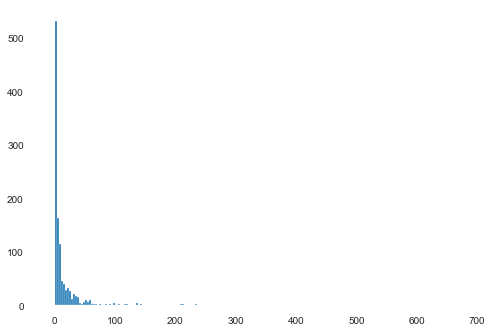

In [39]:
plt.hist(twitch_df["Total_Earnings"], bins=200)
plt.show()

In [40]:
temp_df = twitch_df.copy()

In [41]:
# temp_df["total_earning_cat"] = pd.qcut(twitch_df["Total_Earnings"], 3, labels=["not worth", "kinda worth", "def worth!"])
# temp_df.head(2)

In [42]:
# plt.hist(temp_df["total_earning_cat"], bins=200)
# plt.show()

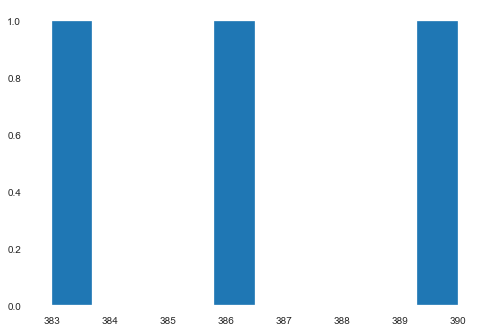

In [43]:
plt.hist(temp_df["total_earn_cat"].value_counts())
plt.show()

In [44]:
temp_df["total_earn_cat"].value_counts()


not worth      390
def worth!     386
kinda worth    383
Name: total_earn_cat, dtype: int64

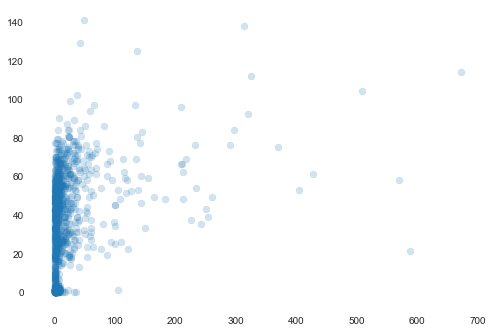

In [45]:
plt.scatter(twitch_df["Total_Earnings"],
            twitch_df["Chatters"], alpha=.2)
plt.show()

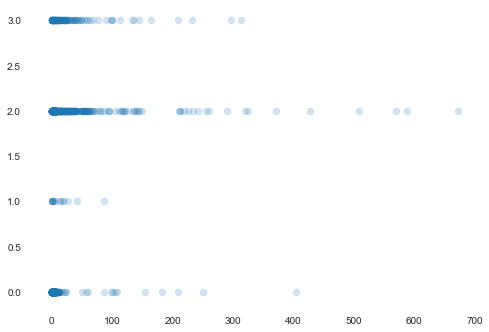

In [46]:
plt.scatter(twitch_df["Total_Earnings"],
            twitch_df["player_mode"], alpha=.2)
plt.show()

In [47]:
cross=pd.crosstab(twitch_df["Total_Earnings"], twitch_df["player_mode"])
cross.head(20)

player_mode,0.0,1.0,2.0,3.0
Total_Earnings,,,,
0.0000,182,5,47,8
0.0035,10,0,2,0
0.0070,3,0,0,0
0.0100,0,0,2,0
0.0140,2,0,0,0
0.0200,0,0,2,0
0.0300,0,0,2,0
0.0350,1,0,0,0
0.0420,1,0,0,0


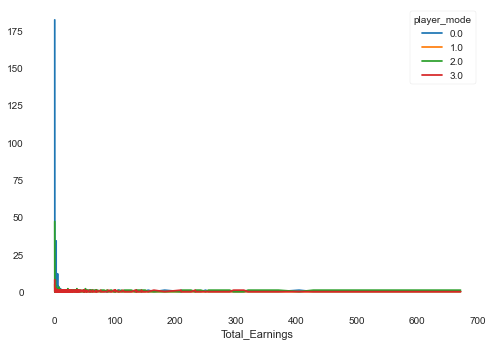

In [48]:
cross.plot();

In [49]:
## I have to do a visualizion of player_mode and mean income
cond_plm01 = twitch_df["player_mode"] == 1 
cond_plm01

0        True
1        True
2       False
3       False
4       False
        ...  
1154    False
1155    False
1156    False
1157    False
1158    False
Name: player_mode, Length: 1159, dtype: bool

In [50]:
single_df = twitch_df[cond_plm01]
single_df["Total_Earnings"].mean()

15.2802

In [51]:
cond_plm02 = twitch_df["player_mode"] == 2 
cond_plm02

0       False
1       False
2        True
3        True
4        True
        ...  
1154    False
1155    False
1156    False
1157     True
1158     True
Name: player_mode, Length: 1159, dtype: bool

In [52]:
multi_df = twitch_df[cond_plm02]
multi_df["Total_Earnings"].mean()

30.980260162601628

In [53]:
cond_plm03 = twitch_df["player_mode"] == 3 
cond_plm03

0       False
1       False
2       False
3       False
4       False
        ...  
1154    False
1155    False
1156    False
1157    False
1158    False
Name: player_mode, Length: 1159, dtype: bool

In [54]:
mixed_df = twitch_df[cond_plm03]
mixed_df["Total_Earnings"].mean()

27.399201986754964

### The mean rev for multi-player games only is highest


In [55]:
def get_confidence_interval(sample, confidence_level):
    from scipy import stats


    # in because we like some np functions 
    # make a np array for our sample
    sample_np_array = np.array(sample)

    # variables we need for the calculations are 
    # std_dev, sample size, t-statistic

    std_dev = np.std(sample_np_array, ddof=1)
    sample_size = sample_np_array.shape[0]

    #here's the new one: from scipy stats 
    # Percent Point Function (Inverse of CDF)
    # this value take ?? percent of data that  as a parameter
    # does same thing as university of I. applet
    tstat = stats.t.ppf(1 - ((1 - confidence_level) / 2), sample_size-1)

    # need the sample mean as x_bar
    x_bar = np.mean(sample_np_array)

    # I need the standard error =
    # standard deviation / squareroot of sample size
    std_err = (std_dev/np.sqrt(sample_size))

    # now I need the Margin of Error
    # which is tstat * standard error
    moe = tstat*std_err

    # then for info purposes lets return the 
    # lower and upper bounds

    lower_bound = x_bar - moe
    upper_bound = x_bar + moe

    confidence_int = namedtuple("confidence_interval", ["lower_bound", "xbar","upper_bound","moe", ])

    # return (lower_bound, x_bar, upper_bound, moe)
    return confidence_int(lower_bound, x_bar, upper_bound, moe)

In [56]:
singlepl_sample_values = get_confidence_interval(single_df["Total_Earnings"], .95)
multipl_sample_values = get_confidence_interval(multi_df["Total_Earnings"], .95)
mixedpl_sample_values = get_confidence_interval(mixed_df["Total_Earnings"], .95)

In [57]:
lightbl_color = "#4780b3"
lighto_color = "#ffb25e"
middle_color = "#fb8b24"
worse_color= "#0f4c5c"
best_color ="#8C031C"

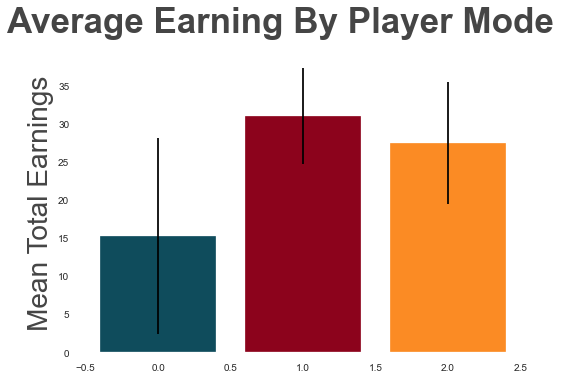

In [58]:
plt.gca()
# #  figsize=(10,10)

# plt.figure(figsize=(10,10))


# fig, ax = plt.subplots(figsize = (10,10))



# this graph I"m keeping and improving
plt.bar(0, height=singlepl_sample_values.xbar, yerr=singlepl_sample_values.moe,
        color=worse_color)
plt.bar(1, height=multipl_sample_values.xbar, yerr=multipl_sample_values.moe,
        color=best_color)
plt.bar(2, height=mixedpl_sample_values.xbar, yerr=mixedpl_sample_values.moe,
        color=middle_color)

plt.title('Average Earning By Player Mode')

# Set bg 

fig.set_facecolor("#F0F0F0")

# set graph background 

ax.set_facecolor("#F0F0F0")

# label the x and y axis


plt.ylabel("Mean Total Earnings", fontsize=28, color= "#454545")

# adjust  y ticks 
# ax.set_yticklabels(labels=[0, 200, 400, 600,800], fontsize=28, color= "#454545")

# get rid of x ticks/labels
ax.axes.xaxis.set_visible(False)

# table at bottom

# lightbl_color = "#4780b3"
# lighto_color = "#ffb25e"
# middle_color = "#fb8b24"
# worse_color= "#0f4c5c"
# dnd_color ="#8C031C"

# colors = [["#F0F0F0","#F0F0F0","#F0F0F0","#F0F0F0","#4f6b75", "#4f6b75"],
#           [ "#F0F0F0","#F0F0F0","#F0F0F0","#F0F0F0","#b36969", "#b36969"]]

# cellText=[]
# for row in ev_comparison_df["Services"]:
#   cellText.append(row)
# table = plt.table(cellText=ev_comparison_df.iloc[:,1:].values,
#                   rowLabels=ev_comparison_df["Services"],
#                   colLabels=ev_comparison_df.columns[1:],
#                   cellColours=colors, 
#                   loc='bottom')

# table.set_fontsize(25)
# table.scale(1,4)

# add title
ev_title = "Average Earning By Player Mode"
plt.title(ev_title, fontsize=35, color= "#454545", fontweight = "bold", x =.45, y=1.05)


#remove spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)



# plt.savefig('ev_sales_mu_v_hair.png')

plt.show()

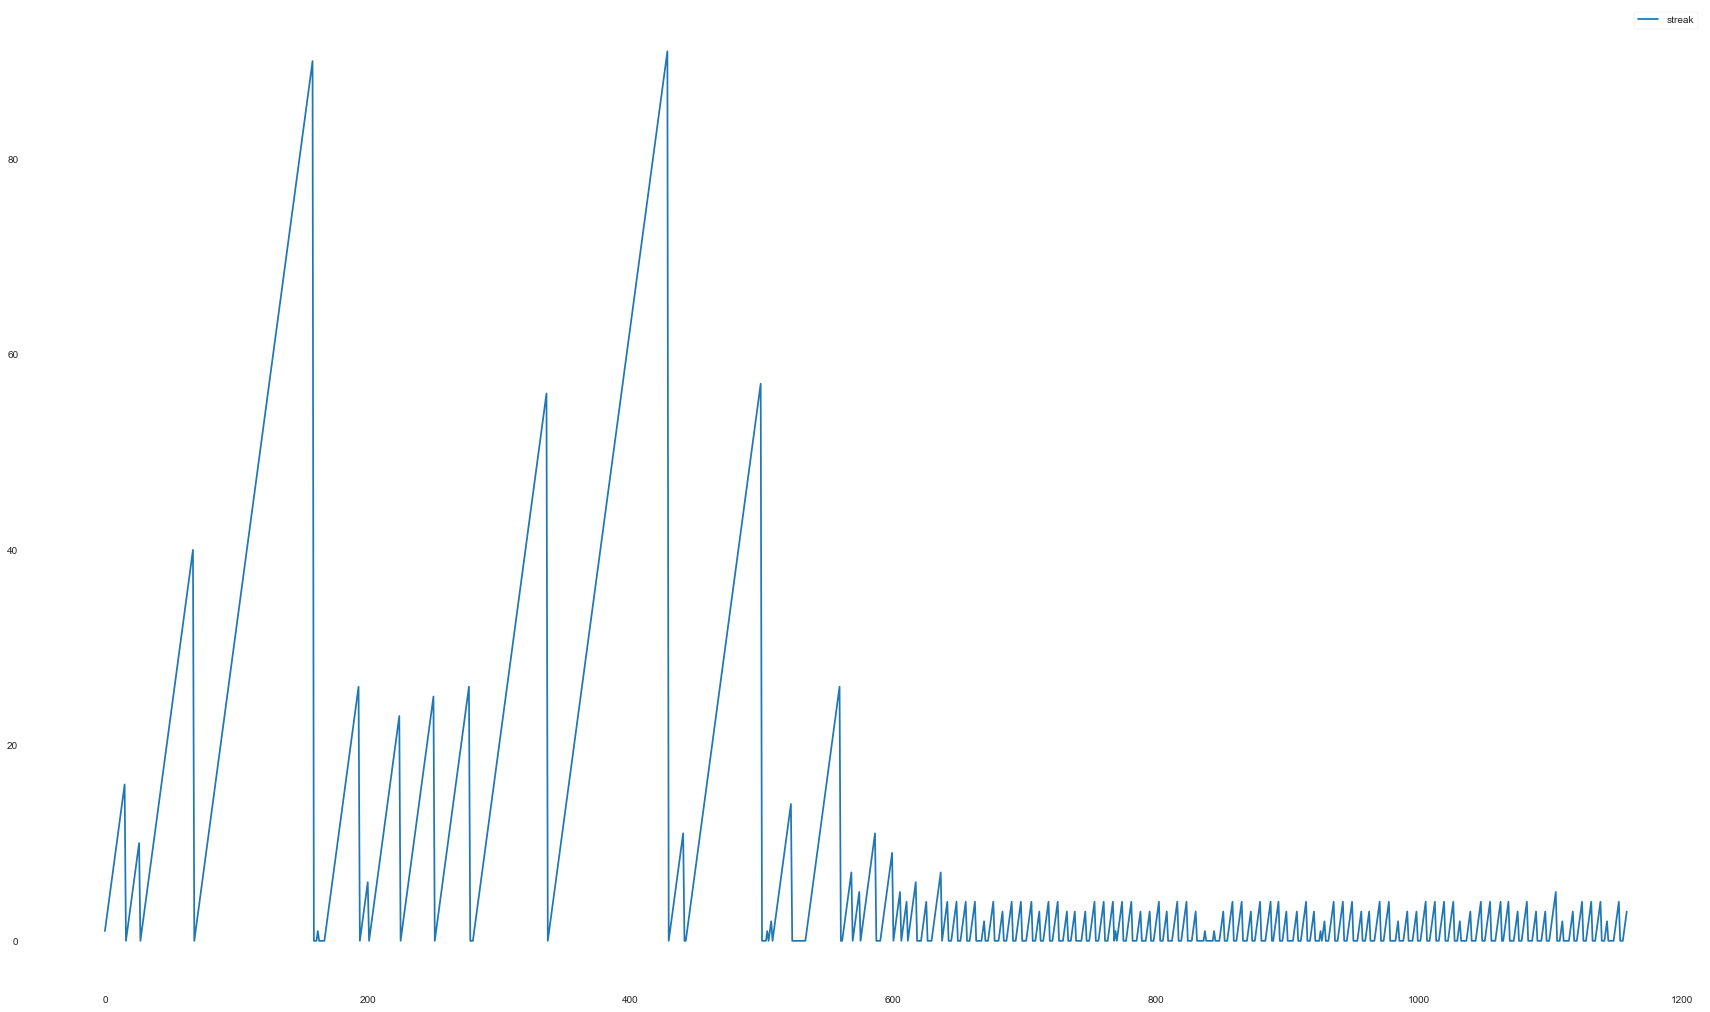

In [59]:
twitch_df.plot( y="streak", figsize =(30,18))


plt.savefig('streak_line_chart.png')

plt.show()

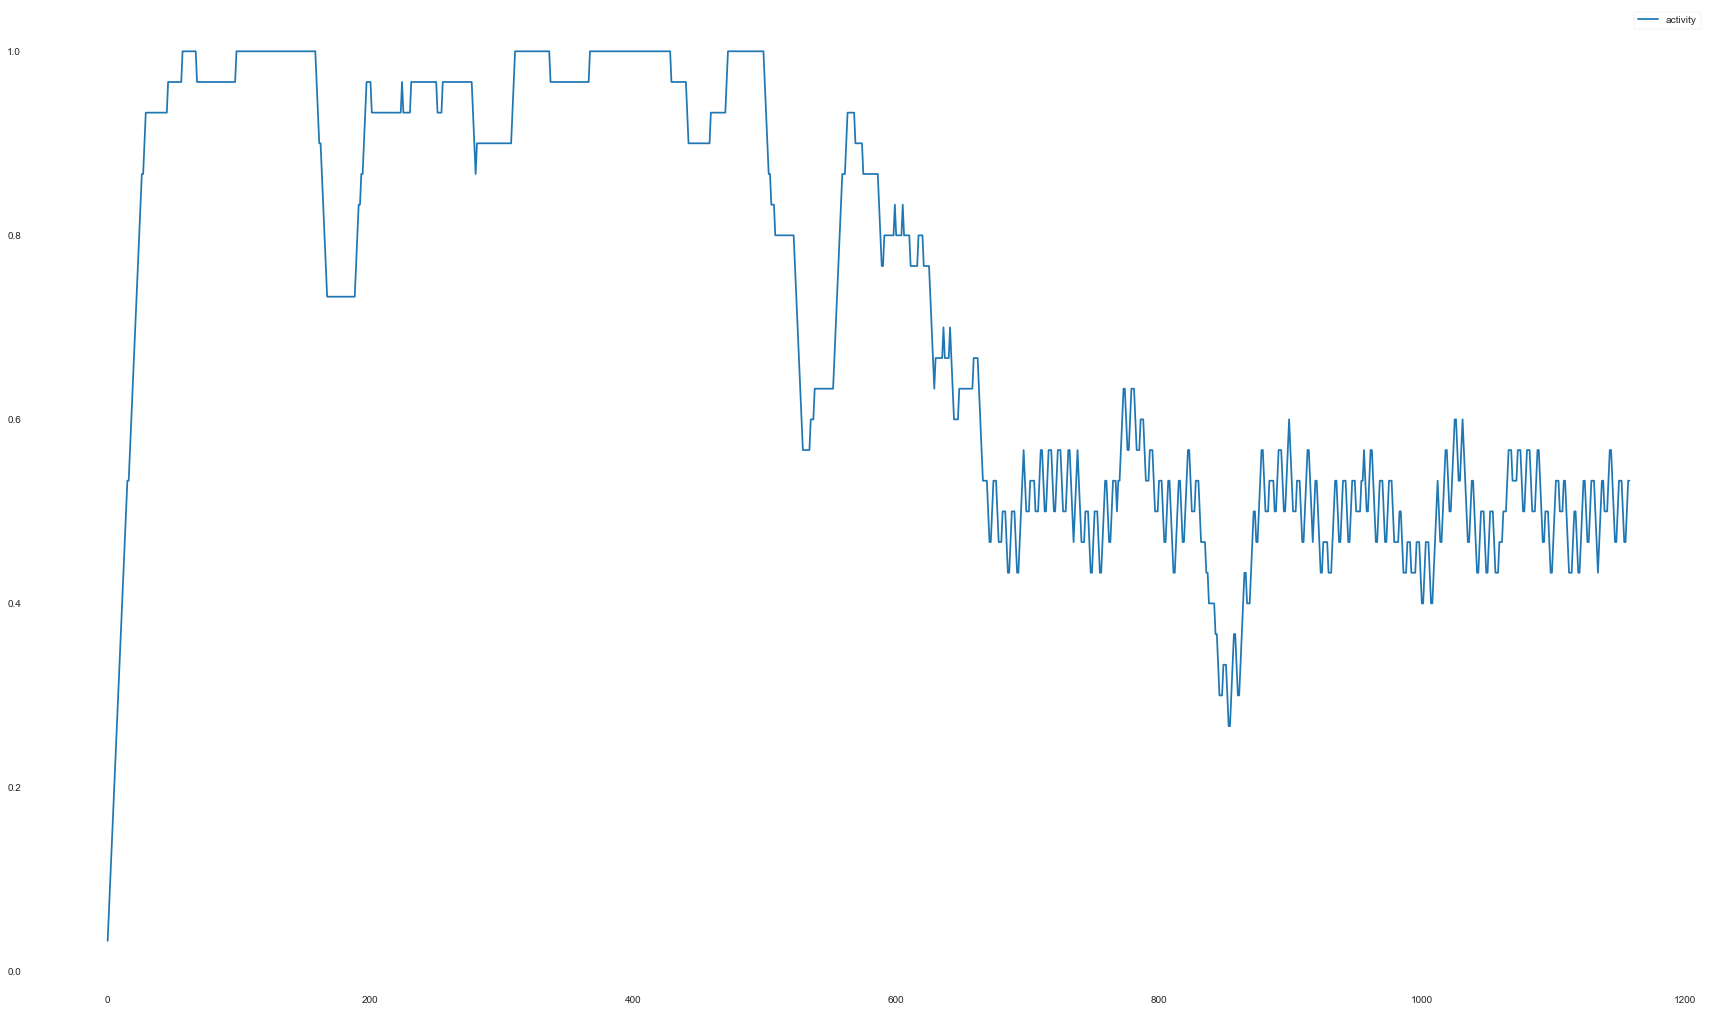

In [60]:
twitch_df.plot( y="activity", figsize =(30,18))

plt.savefig('activity_line_chart.png')

plt.show()

In [61]:
twitch_df["player_mode"].value_counts()

0.0    501
2.0    492
3.0    151
1.0     15
Name: player_mode, dtype: int64

In [62]:
twitch_df.columns

Index(['Date', 'stream_date_id', 'player_mode', 'DST', 'ONI', 'Chatting',
       'Stardew', 'DD', 'Drawful2', 'Cuphead', 'Terraria', 'Escapists2',
       'Choice_Chamber', 'Jackbox', 'Hollow_Knight', 'Subnautica',
       'Use_Your_Words', 'Moonlighter', 'Graveyard_Keeper', 'Marbles', '7D2D',
       'Dream_Daddy', 'ARK', 'other_game', 'Average Viewers', 'Chat Messages',
       'Chatters', 'Clip Views', 'Clips Created', 'Follows',
       'Hosts and Raids Viewers (%)', 'Live Views', 'Max Viewers',
       'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'Sub Revenue',
       'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue', 'Ad Revenue',
       'Extensions Revenue', 'Bounties Revenue', 'donations', 'Prime Subs',
       'Total Paid Subs', 'Tier 1 subs', 'Tier 2 subs',

In [63]:
corr_list = ['stream_date_id', 'player_mode', 'DST', 'ONI', 'Chatting',
       'Stardew', 'DD', 'Drawful2', 'Cuphead', 'Terraria', 'Escapists2',
       'Choice_Chamber', 'Jackbox', 'Hollow_Knight', 'Subnautica',
       'Use_Your_Words', 'Moonlighter', 'Graveyard_Keeper', 'Marbles', '7D2D',
       'Dream_Daddy', 'ARK', 'other_game', 'Average Viewers', 'Chat Messages',
       'Chatters', 'Clip Views', 'Clips Created', 'Follows',
       'Hosts and Raids Viewers (%)', 'Live Views', 'Max Viewers',
        'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'Total_Earnings',
       'total_earn_cat']

In [64]:
twitch_subset01_df = twitch_df[corr_list]
twitch_subset01_df.shape

(1159, 47)

In [65]:

# correlation matrix stuff - to see linear correlations
corr_matrix = twitch_subset01_df.corr()

In [66]:
corr_matrix["Total_Earnings"].sort_values(ascending=False)

Total_Earnings                 1.000000
Chatters                       0.333766
Chat Messages                  0.298061
Unique Viewers                 0.280546
Live Views                     0.278025
Clips Created                  0.261347
Hosts and Raids Viewers (%)    0.237196
Minutes Streamed               0.232080
Max Viewers                    0.215254
player_mode                    0.202948
Average Viewers                0.197042
Chatting                       0.193005
Marbles                        0.146199
avg_message_per_viewer         0.140919
other_game                     0.136930
DST                            0.129087
Jackbox                        0.112173
day_of_week_3                  0.107523
Escapists2                     0.105613
day_of_week_2                  0.090846
Stardew                        0.084417
Drawful2                       0.067253
7D2D                           0.058255
user_chatting_percent          0.056528
day_of_week_1                  0.055382


In [67]:
## NOTE: this is Absolute Value of correlation Matrix!!

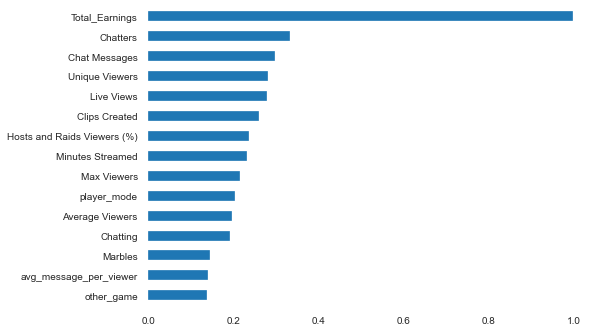

In [68]:
corr_matrix["Total_Earnings"].abs().sort_values().tail(15).plot.barh()

plt.savefig('corr_Matrix_absolute_value_chart.png')

plt.show()

In [69]:
# twitch_df["Extensions Revenue"]= twitch_df["Extensions Revenue"].astype(str).astype(float)

In [70]:
# twitch_df["Bounties Revenue"]= twitch_df["Bounties Revenue"].astype(str).astype(float)

In [71]:
# twitch_df["Tier 2 subs"]= twitch_df["Tier 2 subs"].astype(str).astype(float)

In [72]:
twitch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1159 non-null   datetime64[ns]
 1   stream_date_id               1159 non-null   int64         
 2   player_mode                  1159 non-null   float64       
 3   DST                          1159 non-null   float64       
 4   ONI                          1159 non-null   float64       
 5   Chatting                     1159 non-null   float64       
 6   Stardew                      1159 non-null   float64       
 7   DD                           1159 non-null   float64       
 8   Drawful2                     1159 non-null   float64       
 9   Cuphead                      1159 non-null   float64       
 10  Terraria                     1159 non-null   float64       
 11  Escapists2                   1159 non-null 

In [73]:
twitch_df.describe(include="all")

<ipython-input-73-0ce9870adc2c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  twitch_df.describe(include="all")


,Date,stream_date_id,player_mode,DST,ONI,Chatting,Stardew,DD,Drawful2,Cuphead,Terraria,Escapists2,Choice_Chamber,Jackbox,Hollow_Knight,Subnautica,Use_Your_Words,Moonlighter,Graveyard_Keeper,Marbles,7D2D,Dream_Daddy,ARK,other_game,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,streak,activity,avg_message_per_viewer,user_chatting_percent,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,donations,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,Total_Sub_Revenue,Total_Earnings,total_earn_cat
count,1159,1159.000000,1159.000000,1159.00000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.00000,1159.000000,1159.000000,1159.000000,1159.00000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159
unique,1158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,2004-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not worth
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390
first,2004-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-08-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,737057.805867,1.252804,0.27610,0.006903,0.141501,0.068162,0.023296,0.100949,0.017256,0.006040,0.005177,0.009491,0.176877,0.018119,0.020708,0.010354,0.005177,0.011217,0.006903,0.050043,0.005177,0.012942,0.105263,21.841096,1163.233822,32.854185,9.550475,1.616911,6.120794,5.237394,171.141501,39.040552,4862.647972,170.433995,112.671268,0.143227,0.143227,0.142364,0.142364,0.142364,0.143227,0.143227,13.141501,0.718148,7.981109,27.384029,2.195889,0.566165,4.809927,6.515626,0.01092,0.003486,0.037101,5.495470,0.22692,0.849871,0.759275,0.087144,0.003451,2.026747,2.018119,0.006040,0.002588,14.102011,19.597481,NaN
std,NaN,435.739214,1.146794,0.44726,0.082830,0.348688,0.252133,0.150907,0.301391,0.130281,0.077514,0.071795,0.097000,0.381729,0.133440,0.142465,0.101269,0.071795,0.105358,0.082830,0.218128,0.071795,0.113074,0.395525,30.263970,1198.362025,26.488704,27.860354,2.420749,15.560376,7.431766,184.835591,57.301411,5

In [74]:
# I need to identify days that were single player, multiplayer, or both.  
# I will hardcode this into the twitch_clean_data_Kelly

In [75]:
twitch_df.nunique()

Date                           1158
stream_date_id                 1158
player_mode                       4
DST                               2
ONI                               2
Chatting                          2
Stardew                           2
DD                                2
Drawful2                          2
Cuphead                           2
Terraria                          2
Escapists2                        2
Choice_Chamber                    2
Jackbox                           2
Hollow_Knight                     2
Subnautica                        2
Use_Your_Words                    2
Moonlighter                       2
Graveyard_Keeper                  2
Marbles                           2
7D2D                              2
Dream_Daddy                       2
ARK                               2
other_game                        6
Average Viewers                 752
Chat Messages                   786
Chatters                        101
Clip Views                  

In [76]:
# temp_df = pd.DataFrame()
# temp_df["stream_date_id"] = twitch_df["Date"].map(datetime.datetime.toordinal)
# temp_df.head()

## Create the Feature Matrix from here


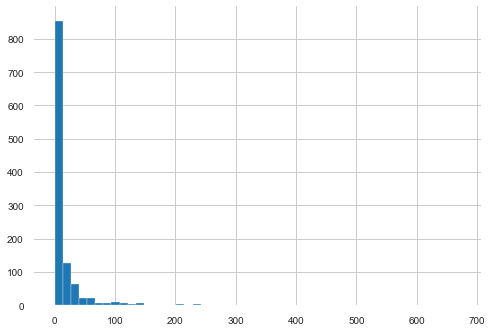

In [77]:
twitch_df['Total_Earnings'].hist(bins=50);

In [78]:
# lets get an average sales price
guess_price = twitch_df['Total_Earnings'].mean()
guess_price

19.597481449525453

In [79]:
# make function that will do it for us
def get_naive_baseline(target_feature):
  guess = target_feature.mean()
  errors = guess - target_feature
  mean_absolute_error = errors.abs().mean()

  naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE"])

  return naive_baseline(guess, errors, mean_absolute_error)

In [80]:
nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [81]:
y_target = twitch_df['Total_Earnings']

In [82]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.


In [83]:
twitch_df["avg_message_per_viewer"].isnull().sum()

0

In [84]:
# print("Baseline MAE:\n", mean_absolute_error(df['price'], [df['price'].mean()]*400716))
# print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings']),
#                         twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings'].iloc[:,0])))
# print('\nTraining MAE:\n', mean_absolute_error(y_train, boost_model.predict(X_train)))

In [85]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [86]:
# print("Baseline MAE:\n", mean_absolute_error(df['price'], [df['price'].mean()]*len(df['price'])))
print("Baseline RMSE:\n", math.sqrt(mean_squared_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))

Baseline RMSE:
 54.40829458760197


In [87]:
print(nbaseline.guess)
print(nbaseline.MAE)
print(nbaseline.errors.shape)

19.597481449525453
24.54002158371927
(1159,)


In [88]:
# # make function that will do it for us
# def get_naive_baseline(target_feature):
#   guess = target_feature.mean()
#   errors = guess - target_feature
#   mean_absolute_error = errors.abs().mean()

# #   y_pred = [target_feature.mean()] * len(target_feature.iloc[:,0])
#   r2 = r2_score(target_feature, y_pred)

#   naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE", "R2"])

#   return naive_baseline(guess, errors, mean_absolute_error, r2)

In [89]:
# nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [90]:
# nbaseline

In [91]:
# twitch_df['Total_Earnings'].mean()

In [92]:
# a= twitch_df['Total_Earnings'] *twitch_df['Total_Earnings'].mean()
# a

### y_pred = column of average predictions

In [ ]:
y_pred = [twitch_df["Total_Earnings"].mean()] * len(twitch_df["Total_Earnings"])
y_pred

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [95]:
t_mse=mean_squared_error(y_target, y_pred)
t_rmse= mean_squared_error(y_target, y_pred, squared=False)

In [96]:
print(t_mse)
print(t_rmse)

2960.2625199312783
54.40829458760197


### R2 - ratio of difference of prediction and actual values

In [97]:
r2 = r2_score(y_target, y_pred)
print(r2)

0.0


In [98]:
np.set_printoptions(threshold=sys.maxsize)
twitch_df.columns

Index(['Date', 'stream_date_id', 'player_mode', 'DST', 'ONI', 'Chatting',
       'Stardew', 'DD', 'Drawful2', 'Cuphead', 'Terraria', 'Escapists2',
       'Choice_Chamber', 'Jackbox', 'Hollow_Knight', 'Subnautica',
       'Use_Your_Words', 'Moonlighter', 'Graveyard_Keeper', 'Marbles', '7D2D',
       'Dream_Daddy', 'ARK', 'other_game', 'Average Viewers', 'Chat Messages',
       'Chatters', 'Clip Views', 'Clips Created', 'Follows',
       'Hosts and Raids Viewers (%)', 'Live Views', 'Max Viewers',
       'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'Sub Revenue',
       'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue', 'Ad Revenue',
       'Extensions Revenue', 'Bounties Revenue', 'donations', 'Prime Subs',
       'Total Paid Subs', 'Tier 1 subs', 'Tier 2 subs',

# short list a Feature Matrix
short_list = ['stream_date_id', 'player_mode', 'DST', 'ONI', 'Chatting',
       'Stardew', 'DD', 'Drawful2', 'Cuphead', 'Terraria', 'Escapists2',
       'Choice_Chamber', 'Jackbox', 'Hollow_Knight', 'Subnautica',
       'Use_Your_Words', 'Moonlighter', 'Graveyard_Keeper', 'Marbles', '7D2D',
       'Dream_Daddy', 'ARK', 'other_game', 'Average Viewers', 'Chat Messages',
       'Chatters', 'Clip Views', 'Clips Created', 'Follows',
       'Hosts and Raids Viewers (%)', 'Live Views', 'Max Viewers',
        'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'Total_Earnings',
       'total_earn_cat']

In [99]:
# short_list = ['Average Viewers', 'Chat Messages', 'Chatters',
#               'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
#        'Max Viewers', 'Minutes Streamed', 'Unique Viewers',
#          'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
#        'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
#         'Total_Earnings', 'streak', 'avg_message_per_viewer',
#         'activity', 'user_chatting_percent']

In [100]:
long_list = [ 'player_mode', 'DST', 'ONI', 'Chatting',
       'Stardew', 'DD', 'Drawful2', 'Cuphead', 'Terraria', 'Escapists2',
       'Choice_Chamber', 'Jackbox', 'Hollow_Knight', 'Subnautica',
       'Use_Your_Words', 'Moonlighter', 'Graveyard_Keeper', 'Marbles', '7D2D',
       'Dream_Daddy', 'ARK', 'other_game', 'Average Viewers', 'Chat Messages',
       'Chatters', 'Clip Views', 'Clips Created', 'Follows',
       'Hosts and Raids Viewers (%)', 'Live Views', 'Max Viewers',
        'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent', 'Total_Earnings',
       'total_earn_cat']

# Fork the feature Matrix for future use


In [217]:
# feature_matrix_df = twitch_df[short_list]
# fork the feature Matrix for future use

feature_matrix_df = twitch_df[long_list]

In [102]:
# Make a function to create Matrix and Target pre validation split
def create_regression_Xmatrix_ytarget(training_df):
  y_target = training_df["Total_Earnings"]
  X_matrix = training_df.drop(["Total_Earnings",'total_earn_cat'] , axis=1)
  return (X_matrix, y_target)

In [103]:
# Make a function to create Matrix and Target pre validation split
def create_classification_Xmatrix_ytarget(training_df):
  y_target = training_df['total_earn_cat']
  X_matrix = training_df.drop(["Total_Earnings",'total_earn_cat'] , axis=1)
  return (X_matrix, y_target)

In [218]:
X_matrix, y_target = create_regression_Xmatrix_ytarget(feature_matrix_df)
print(X_matrix.shape)
print(y_target.shape)

(1159, 44)
(1159,)


In [105]:
X_matrix.columns

Index(['player_mode', 'DST', 'ONI', 'Chatting', 'Stardew', 'DD', 'Drawful2',
       'Cuphead', 'Terraria', 'Escapists2', 'Choice_Chamber', 'Jackbox',
       'Hollow_Knight', 'Subnautica', 'Use_Your_Words', 'Moonlighter',
       'Graveyard_Keeper', 'Marbles', '7D2D', 'Dream_Daddy', 'ARK',
       'other_game', 'Average Viewers', 'Chat Messages', 'Chatters',
       'Clip Views', 'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)',
       'Live Views', 'Max Viewers', 'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent'],
      dtype='object')

# Train Val Test split

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_matrix, y_target, train_size=0.80, test_size=0.20, random_state=42)

In [221]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test.shape)
print(y_test.shape)

(927, 44)
(927,)
(232, 44)
(232,)


In [222]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, train_size=0.80, test_size=0.20, random_state=42)

In [223]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(741, 44)
(741,)
(186, 44)
(186,)
(232, 44)
(232,)


# Let's make a pipeline!  (finally...!)

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import RidgeCV

In [246]:
# lr_model = make_pipeline(
#     SelectKBest(),
#     LinearRegression(normalize=True)
# )

In [330]:
lr_model = make_pipeline(
    SelectKBest(),
    RidgeCV(scoring='neg_mean_absolute_error',
           cv=15)
)

### Short list transforms - SelectKBest, 

### Linear Model - Ridge Regression


In [331]:
lr_model.fit(X_train, y_train)

/Users/kellycho/.local/share/virtualenvs/StarKells_Twitch_data-N6g9n_I3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Pipeline(steps=[('selectkbest', SelectKBest()),
                ('ridgecv',
                 RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=15,
                         scoring='neg_mean_absolute_error'))])

## Grid Search here would be good.  

In [332]:
training_MAE = mean_absolute_error(y_train, lr_model.predict(X_train))

In [333]:
training_MSE=mean_squared_error(y_train, lr_model.predict(X_train))

In [334]:
training_RMSE=mean_squared_error(y_train, lr_model.predict(X_train), squared=False)

In [335]:
validation_MAE = mean_absolute_error(y_val, lr_model.predict(X_val))

In [336]:
validation_MAE = mean_absolute_error(y_val, lr_model.predict(X_val))

In [337]:
validation_MSE = mean_squared_error(y_val, lr_model.predict(X_val))

In [338]:
validation_RMSE = mean_squared_error(y_val, lr_model.predict(X_val), squared=False)
validation_r2_01 =  r2_score(y_val, lr_model.predict(X_val))

In [339]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
# print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
#                         [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Training MSE: {training_MSE}")
print(f"Training RMSE: {training_RMSE}")

print()
print(f"Validation MAE: {validation_MAE}")
print(f"Validation MSE: {validation_MSE}")
print(f"Validation RMSE: {validation_RMSE}")
print(f"Validation R^2: {validation_r2_01}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Training MAE: 22.9142222052938
Training MSE: 2928.7181092365267
Training RMSE: 54.117632147355884

Validation MAE: 23.13829110217074
Validation MSE: 3330.01383170405
Validation RMSE: 57.706272030898425
Validation R^2: 0.05335949216665625


In [340]:
response_var_column01 = lr_model.predict(X_train)
training_rsme01 = mean_squared_error(y_train, response_var_column01, squared=False)
training_r2_01 = r2_score(y_train, response_var_column01)

val_r2_01 =  r2_score(y_val, lr_model.predict(X_val))


In [341]:
print(f"Training RMSE: {training_rsme01}")
print(f"Training R^2: {training_r2_01}")

print()

print(f"Validation R^2: {val_r2_01}")



Training RMSE: 54.117632147355884
Training R^2: 0.0977912289884737

Validation R^2: 0.05335949216665625


### Random Forest Regressor

In [342]:
from sklearn.ensemble import RandomForestRegressor

In [343]:
rf_bag_model = make_pipeline(
    RandomForestRegressor(random_state=42,
                           n_estimators=505)
)

In [344]:
rf_bag_model.fit(X_train, y_train)

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(n_estimators=505, random_state=42))])

In [127]:
training_MAE = mean_absolute_error(y_train, rf_bag_model.predict(X_train))
training_MSE=mean_squared_error(y_train, rf_bag_model.predict(X_train))
training_RMSE=mean_squared_error(y_train, rf_bag_model.predict(X_train), squared=False)
training_r2_02 = r2_score(y_train, rf_bag_model.predict(X_train))


In [128]:
validation_MAE = mean_absolute_error(y_val, rf_bag_model.predict(X_val))
validation_MSE = mean_squared_error(y_val, rf_bag_model.predict(X_val))
validation_RMSE = mean_squared_error(y_val, rf_bag_model.predict(X_val), squared=False)
validation_r2_02 = r2_score(y_val, rf_bag_model.predict(X_val))

In [129]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
# print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
#                         [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Training MSE: {training_MSE}")
print(f"Training RMSE: {training_RMSE}")
print(f"Training R2: {training_r2_02}")

print()
print(f"Validation MAE: {validation_MAE}")
print(f"Validation MSE: {validation_MSE}")
print(f"Validation RMSE: {validation_RMSE}")
print(f"Validation R^2: {validation_r2_02}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Training MAE: 8.615299582238157
Training MSE: 381.8318762073129
Training RMSE: 19.540518831579497
Training R2: 0.8823744536288509

Validation MAE: 20.5826962335934
Validation MSE: 3232.5671354736937
Validation RMSE: 56.85566933449727
Validation R^2: 0.08106117590380191


In [130]:
# response_var_column03 = rf_bag_model.predict(X_train)
# model_rsme03 = mean_squared_error(y_train, response_var_column03, squared=False)
# model_r2_03 = r2_score(y_train, response_var_column03)

In [131]:
# print(f"Model RMSE: {model_rsme03}")
# print(f"Model R^2: {model_r2_03}")

## try the GradientBoostingRegressor

In [132]:
from sklearn.ensemble import GradientBoostingRegressor

In [133]:
rf_boost_model = make_pipeline(
    GradientBoostingRegressor(random_state=42)
)

rf_boost_model.fit(X_train, y_train)

Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [134]:
training_MAE2 = mean_absolute_error(y_train, rf_boost_model.predict(X_train))

In [135]:
validation_MAE2 = mean_absolute_error(y_val, rf_boost_model.predict(X_val))

In [136]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE2}")
print(f"Validation MAE: {validation_MAE2}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Baseline RMSE:
 4.953788609107101
Training MAE: 9.847266887893879
Validation MAE: 21.178634129256622


In [137]:
response_var_column_train = rf_boost_model.predict(X_train)
training_rsme = mean_squared_error(y_train, response_var_column_train, squared=False)
training_r2 = r2_score(y_train, response_var_column_train)

response_var_column_val = rf_boost_model.predict(X_val)
val_rsme = mean_squared_error(y_val, response_var_column_val, squared=False)
val_r2 = r2_score(y_val, response_var_column_val)

In [138]:
print(f"Training RMSE: {training_rsme}")
print(f"Training R^2: {training_r2}")

print()
print(f"Validation RMSE: {val_rsme}")
print(f"Validation R^2: {val_r2}")

Training RMSE: 18.412056154054657
Training R^2: 0.8955678897652147

Validation RMSE: 58.51006835474644
Validation R^2: 0.02680412819979705


 ### Try XGBoost
 

In [139]:

from xgboost import XGBRegressor

In [140]:
xgb_model = make_pipeline(
   XGBRegressor()
)
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [141]:
training_MAE07 = mean_absolute_error(y_train, xgb_model.predict(X_train))

In [142]:
validation_MAE07 = mean_absolute_error(y_val, xgb_model.predict(X_val))

In [143]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE07}")
print(f"Validation MAE: {validation_MAE07}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Baseline RMSE:
 4.953788609107101
Training MAE: 0.5143960702467545
Validation MAE: 20.984620922561618


In [144]:
# response_var_column04 = xgb_model.predict(X_train)
# model_rsme02 = mean_squared_error(y_train, response_var_column04, squared=False)
# model_r2_02 = r2_score(y_train, response_var_column04)

In [145]:
response_var_column_train04 = xgb_model.predict(X_train)
training_rsme04 = mean_squared_error(y_train, response_var_column_train04, squared=False)
training_r2 = r2_score(y_train, response_var_column_train04)

response_var_column_val04 = xgb_model.predict(X_val)
val_rsme04 = mean_squared_error(y_val, response_var_column_val04, squared=False)
val_r204 = r2_score(y_val, response_var_column_val04)

In [146]:
# print(f"Model RMSE: {model_rsme02}")
# print(f"Model R^2: {model_r2_02}")

In [147]:
print(f"Training RMSE: {training_rsme04}")
print(f"Training R^2: {training_r2}")

print()
print(f"Validation RMSE: {val_rsme04}")
print(f"Validation R^2: {val_r204}")

Training RMSE: 0.8685366611954233
Training R^2: 0.999767616235914

Validation RMSE: 58.7914652375124
Validation R^2: 0.017420689540682766


## Feature Importances

In [148]:
# rf_bag_model = make_pipeline(
#     RandomForestRegressor(random_state=42)
# )

In [149]:
# rf_bag_model.fit(X_train, y_train)

In [150]:
fi= rf_bag_model.named_steps["randomforestregressor"].feature_importances_

In [151]:
importances = pd.Series(fi, X_train.columns).sort_values(ascending=False)
importances

Chatters                       0.261671
Average Viewers                0.133364
Clip Views                     0.064319
activity                       0.047535
avg_message_per_viewer         0.046465
Chat Messages                  0.046216
Hosts and Raids Viewers (%)    0.045162
user_chatting_percent          0.043413
Live Views                     0.042440
Max Viewers                    0.041024
Follows                        0.036373
Minutes Streamed               0.029355
Unique Viewers                 0.023994
Clips Created                  0.023852
Stardew                        0.017227
streak                         0.017114
other_game                     0.010827
day_of_week_6                  0.009833
day_of_week_3                  0.007751
day_of_week_1                  0.006965
player_mode                    0.006815
7D2D                           0.005454
DST                            0.005159
day_of_week_2                  0.004929
Chatting                       0.004067


<AxesSubplot:>

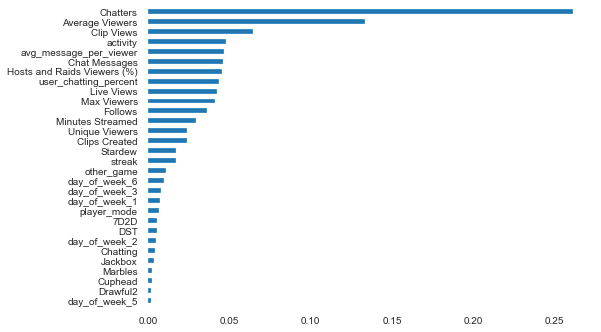

In [152]:
importances.head(30).sort_values().plot(kind="barh")

## Drop Column

### Permutation IMportance
train model on full dataset
Choose a column an shuffle rows
See how the validation metrics change

In [153]:
X_val["activity"].head(10)

701     0.500000
544     0.633333
413     1.000000
47      0.966667
1103    0.533333
776     0.566667
483     1.000000
790     0.533333
589     0.766667
148     1.000000
Name: activity, dtype: float64

In [154]:
X_val_permuted = X_val.copy()

In [155]:
np.random.permutation(X_val["activity"])[:10]

array([0.96666667, 0.76666667, 0.3       , 0.56666667, 0.96666667,
       0.5       , 0.53333333, 0.93333333, 0.96666667, 0.96666667])

In [156]:
X_val_permuted["activity"] = np.random.permutation(X_val_permuted["activity"])

In [157]:
X_val_permuted["activity"].head(10)

701     0.966667
544     0.800000
413     0.500000
47      0.933333
1103    1.000000
776     0.966667
483     1.000000
790     0.800000
589     0.500000
148     0.466667
Name: activity, dtype: float64

In [158]:
X_val_permuted["activity"].value_counts()

0.966667    24
1.000000    21
0.500000    20
0.533333    18
0.933333    16
0.466667    14
0.900000    10
0.633333     8
0.566667     8
0.800000     8
0.733333     5
0.866667     4
0.833333     4
0.666667     4
0.433333     4
0.766667     4
0.300000     4
0.600000     4
0.400000     2
0.333333     1
0.200000     1
0.033333     1
0.266667     1
Name: activity, dtype: int64

In [159]:
X_val["activity"].value_counts()

0.966667    24
1.000000    21
0.500000    20
0.533333    18
0.933333    16
0.466667    14
0.900000    10
0.633333     8
0.566667     8
0.800000     8
0.733333     5
0.866667     4
0.833333     4
0.666667     4
0.433333     4
0.766667     4
0.600000     4
0.300000     4
0.400000     2
0.333333     1
0.200000     1
0.033333     1
0.266667     1
Name: activity, dtype: int64

In [160]:
rf_boost_model2 = make_pipeline(
    GradientBoostingRegressor(random_state=42)
)

rf_boost_model2.fit(X_train, y_train)

Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [161]:
validation_MAE2 = mean_absolute_error(y_val, rf_boost_model2.predict(X_val))

In [162]:
validation_MAE3 = mean_absolute_error(y_val, rf_boost_model2.predict(X_val_permuted))

In [163]:
training_MAE2 = mean_absolute_error(y_train, rf_boost_model2.predict(X_train))

In [164]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print(f"Training MAE: {training_MAE2}")
print(f"Validation MAE: {validation_MAE2}")
print(f"Validation MAE Permuted: {validation_MAE3}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Training MAE: 9.847266887893879
Validation MAE: 21.178634129256622
Validation MAE Permuted: 23.720942129866526


In [165]:
response_var_column06 = rf_boost_model2.predict(X_train)
model_rsme06 = mean_squared_error(y_train, response_var_column06, squared=False)
model_r2_06 = r2_score(y_train, response_var_column06)

In [166]:
print(f"Model RMSE: {model_rsme06}")
print(f"Model R^2: {model_r2_06}")

Model RMSE: 18.412056154054657
Model R^2: 0.8955678897652147


### Automate it. 

In [167]:
from sklearn.inspection import permutation_importance

In [168]:
pi = permutation_importance(rf_boost_model2, X_val, y_val)

In [169]:
type(pi)

sklearn.utils.Bunch

In [170]:
pi

{'importances_mean': array([ 1.69548093e-02,  6.27086208e-06,  0.00000000e+00, -2.65275637e-04,
         1.89491433e-02,  0.00000000e+00,  0.00000000e+00, -1.18369748e-04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.68936598e-04,
         3.47567393e-05,  0.00000000e+00,  1.44697945e-04,  0.00000000e+00,
         0.00000000e+00,  2.85665307e-03,  4.20542507e-03,  0.00000000e+00,
         4.41295508e-04,  2.65292458e-03,  4.11344655e-02, -1.56275465e-02,
         1.23523748e-01,  3.23162419e-02,  2.94981148e-03,  2.15680736e-03,
         1.54103955e-03,  6.57246323e-02,  4.18877559e-02,  5.07420059e-03,
         6.37636455e-04,  1.13764241e-03,  0.00000000e+00,  5.27565059e-03,
         1.16223569e-03,  0.00000000e+00,  5.34948786e-06, -1.54826882e-03,
         5.91136678e-03, -9.72435297e-04, -3.11507786e-02, -5.54884372e-04]),
 'importances_std': array([8.19519641e-03, 1.25417242e-05, 0.00000000e+00, 1.93917385e-04,
        1.33061205e-02, 0.00000000e+00, 0.00000000e

In [171]:
pi_df = pd.DataFrame({"importances_mean": np.round(pi["importances_mean"], 4),
                     "importances_std": pi["importances_std"]},
                    index=X_val.columns)

In [172]:
pi_df.sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
Chatters,0.1235,0.016001
Live Views,0.0657,0.019527
Max Viewers,0.0419,0.016187
Average Viewers,0.0411,0.015275
Clip Views,0.0323,0.022148
Stardew,0.0189,0.013306
player_mode,0.0170,0.008195
streak,0.0059,0.004843
day_of_week_3,0.0053,0.002487
Minutes Streamed,0.0051,0.006082


## I will use this graph in conclusion for the appropriate Model


<AxesSubplot:>

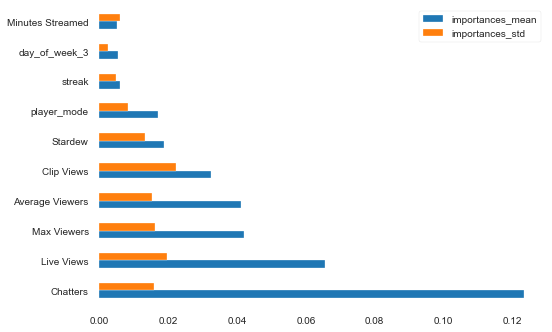

In [173]:
pi_df.sort_values(by="importances_mean", ascending=False).head(10).plot(kind="barh")

### Compare Permutation importance (top 15) with SelectKBest(Default)

In [174]:
perm_shortlist = pi_df.sort_values(by="importances_mean", ascending=False).head(33).index

In [175]:
perm_shortlist

Index(['Chatters', 'Live Views', 'Max Viewers', 'Average Viewers',
       'Clip Views', 'Stardew', 'player_mode', 'streak', 'day_of_week_3',
       'Minutes Streamed', '7D2D', 'Clips Created', 'Marbles', 'other_game',
       'Follows', 'Hosts and Raids Viewers (%)', 'day_of_week_4',
       'day_of_week_1', 'Unique Viewers', 'ARK', 'Jackbox', 'Use_Your_Words',
       'day_of_week_6', 'day_of_week_2', 'ONI', 'DD', 'Terraria', 'Drawful2',
       'day_of_week_5', 'Dream_Daddy', 'Graveyard_Keeper', 'Moonlighter',
       'Subnautica'],
      dtype='object')

In [176]:
lr_perm_model = make_pipeline(
    LinearRegression()
)

lr_perm_model.fit(X_train[perm_shortlist], y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [177]:
training_MAE4 = mean_absolute_error(y_train, lr_perm_model.predict(X_train[perm_shortlist]))

In [178]:
validation_MAE4 = mean_absolute_error(y_val, lr_perm_model.predict(X_val[perm_shortlist]))

## original lr w/ SelectKBest

In [179]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Baseline RMSE:
 4.953788609107101
Training MAE: 8.615299582238157
Validation MAE: 20.5826962335934


## lr w/ Perm Importance Shortlist

In [180]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE4}")
print(f"Validation MAE: {validation_MAE4}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Baseline RMSE:
 4.953788609107101
Training MAE: 24.70848278841463
Validation MAE: 24.461297716674604


## Make some Classification Models
### Use Majority Classifier/Accuracy as metric


#### I actually have to fork my Feature Matrix.  

In [181]:
feature_matrix_df.head(2)

,player_mode,DST,ONI,Chatting,Stardew,DD,Drawful2,Cuphead,Terraria,Escapists2,Choice_Chamber,Jackbox,Hollow_Knight,Subnautica,Use_Your_Words,Moonlighter,Graveyard_Keeper,Marbles,7D2D,Dream_Daddy,ARK,other_game,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Streamed,Unique Viewers,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,streak,activity,avg_message_per_viewer,user_chatting_percent,Total_Earnings,total_earn_cat
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.98,114,6,0,0,1,0.0,11,5,157,9,0,0,0,0,0,1,0,1,0.033333,12.666667,66.666667,0.0,not worth
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.47,260,9,0,0,2,0.0,35,8,192,26,0,0,0,0,0,0,1,2,0.066667,10.000000,34.615385,0.0,not worth


In [182]:
# fork the feature Matrix for future use
X_matrix, y_target = create_classification_Xmatrix_ytarget(feature_matrix_df)
print(X_matrix.shape)
print(y_target.shape)

(1159, 44)
(1159,)


In [183]:
X_matrix.head(2)

,player_mode,DST,ONI,Chatting,Stardew,DD,Drawful2,Cuphead,Terraria,Escapists2,Choice_Chamber,Jackbox,Hollow_Knight,Subnautica,Use_Your_Words,Moonlighter,Graveyard_Keeper,Marbles,7D2D,Dream_Daddy,ARK,other_game,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Streamed,Unique Viewers,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,streak,activity,avg_message_per_viewer,user_chatting_percent
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.98,114,6,0,0,1,0.0,11,5,157,9,0,0,0,0,0,1,0,1,0.033333,12.666667,66.666667
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.47,260,9,0,0,2,0.0,35,8,192,26,0,0,0,0,0,0,1,2,0.066667,10.000000,34.615385


In [184]:
y_target.head(2)

0    not worth
1    not worth
Name: total_earn_cat, dtype: category
Categories (3, object): ['not worth' < 'kinda worth' < 'def worth!']

## Baseline Accuracy


In [185]:
print('Baseline Accuracy:', y_target.value_counts(normalize=True).max())

Baseline Accuracy: 0.3364969801553063


In [186]:
y_target.head()

0    not worth
1    not worth
2    not worth
3    not worth
4    not worth
Name: total_earn_cat, dtype: category
Categories (3, object): ['not worth' < 'kinda worth' < 'def worth!']

#### Train/Val/Test Split

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_matrix, y_target, train_size=0.80, test_size=0.20, random_state=42)

In [189]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test.shape)
print(y_test.shape)

(927, 44)
(927,)
(232, 44)
(232,)


In [190]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, train_size=0.80, test_size=0.20, random_state=42)

In [191]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(741, 44)
(741,)
(186, 44)
(186,)
(232, 44)
(232,)


In [192]:
y_train.head()

592    def worth!
788    def worth!
537    def worth!
658     not worth
45      not worth
Name: total_earn_cat, dtype: category
Categories (3, object): ['not worth' < 'kinda worth' < 'def worth!']

In [193]:
from sklearn.tree import DecisionTreeClassifier # decision Tree for classification problems
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [194]:
class_tree_model_01 = make_pipeline(
    SelectKBest(),
    DecisionTreeClassifier(random_state=42)
)
# class_tree_model_01.fit(X_train, y_train)

In [195]:
param_grid = [
             { "selectkbest__k" : [5, 8, 10, 30],
              "decisiontreeclassifier__max_depth" : [8, 12, 15],
              "decisiontreeclassifier__min_samples_split" : [2, 4, 6, 10, 15]
             }
]
# forest_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(class_tree_model_01, param_grid, cv = 10,
                           scoring="accuracy",
                           return_train_score=True,
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    7.6s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('selectkbest', SelectKBest()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'decisiontreeclassifier__max_depth': [8, 12, 15],
                          'decisiontreeclassifier__min_samples_split': [2, 4, 6,
                                                                        10,
                                                                        15],
                          'selectkbest__k': [5, 8, 10, 30]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [196]:
print('Best hyperparameters', grid_search.best_params_)

Best hyperparameters {'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__min_samples_split': 15, 'selectkbest__k': 30}


In [197]:
best_model_class_t_01 = grid_search.best_estimator_
best_model_class_t_01

Pipeline(steps=[('selectkbest', SelectKBest(k=30)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=8, min_samples_split=15,
                                        random_state=42))])

In [198]:
print(f"Training Accuracy: {best_model_class_t_01.score(X_train, y_train)}")
print(f"Validation Accuracy: {best_model_class_t_01.score(X_val, y_val)}")

Training Accuracy: 0.747638326585695
Validation Accuracy: 0.5161290322580645


In [199]:
print(f"Test Accuracy: {best_model_class_t_01.score(X_test, y_test)}")

Test Accuracy: 0.47413793103448276


### Confusion Matrix 


In [200]:
from sklearn.metrics import plot_confusion_matrix, classification_report

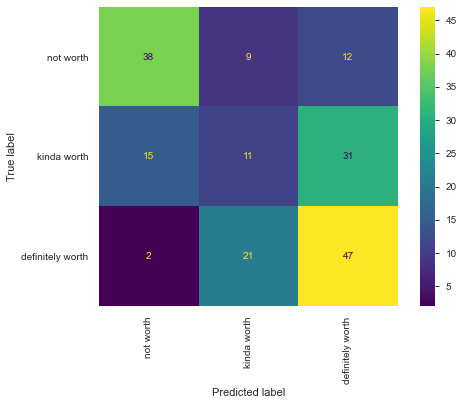

In [201]:
plot_confusion_matrix(best_model_class_t_01, X_val, y_val, 
                      values_format='.0f', 
                      display_labels=["not worth", "kinda worth", "definitely worth"],
                      xticks_rotation='vertical');


plt.savefig('twitch_tree_classifier_confusion_matrix_chart.png')

plt.show()

## Try Permutation Importance for this model


In [202]:
pi02 = permutation_importance(best_model_class_t_01, X_val, y_val)

In [203]:
pi02_df = pd.DataFrame({"importances_mean": np.round(pi["importances_mean"], 4),
                     "importances_std": pi["importances_std"]},
                    index=X_val.columns)

In [204]:
pi_df.sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
Chatters,0.1235,0.016001
Live Views,0.0657,0.019527
Max Viewers,0.0419,0.016187
Average Viewers,0.0411,0.015275
Clip Views,0.0323,0.022148
Stardew,0.0189,0.013306
player_mode,0.0170,0.008195
streak,0.0059,0.004843
day_of_week_3,0.0053,0.002487
Minutes Streamed,0.0051,0.006082


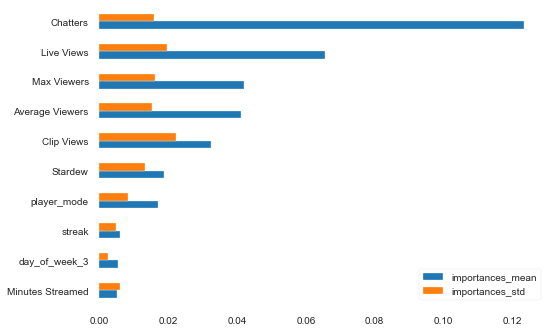

In [212]:
pi02_df.sort_values(by="importances_mean", ascending=False).head(10).sort_values(by="importances_mean").plot(kind="barh")

plt.savefig('twitch_tree_classifier_permutation_importance_top_ten_bar_chart.png')

plt.show()

### Fake for Shap plot

In [ ]:
temp_df = feature_matrix_df.copy()

In [ ]:
temp_df.head()

In [ ]:
temp_df = temp_df.drop("Total_Earnings", axis=1)
temp_df.head(2)

In [ ]:
temp_df["total_earn_cat"].value_counts()

In [ ]:
#  # replace the unknown game values with 0
#     replace_list = ["inf", "Unknown"]
#     df= df.replace(to_replace=replace_list, value=0)   
replace_list = ["not worth", "def worth!", "kinda worth"]
temp_df["total_earn_cat"] = temp_df["total_earn_cat"].replace(to_replace= replace_list, value=[0,1,2] )

In [ ]:
temp_df["total_earn_cat"].value_counts()

In [ ]:
fake_train, fake_val = train_test_split(temp_df, test_size=.2, random_state=42)

In [ ]:
fake_feat = ['player_mode','Chat Messages', 'Chatters','Minutes Streamed',
               'day_of_week_1', 'day_of_week_2', 'day_of_week_3',]

fake_target = ["total_earn_cat"]

In [ ]:
X_fake_train = fake_train[fake_feat]
y_fake_train = fake_train[fake_target]

X_fake_val = fake_val[fake_feat]
y_fake_val = fake_val[fake_target]

In [ ]:
class_tree_model_01 =  DecisionTreeClassifier(random_state=42)
class_tree_model_01.fit(X_fake_train, y_fake_train)

In [ ]:
class_tree_model_01.predict(X_fake_val)[28]

In [ ]:
fake_row = X_fake_val.iloc[[28]]
fake_row

## Install shap - maybe in reqs

In [ ]:
!pip install shap

In [ ]:
import shap 

In [ ]:
explainer = shap.TreeExplainer(class_tree_model_01)
shap_values = explainer.shap_values(fake_row) # must be 2D array 


In [ ]:
shap.initjs()
shap.force_plot(
    base_value= explainer.expected_value[0], # the index is for which classification value is being explained
    shap_values=shap_values[0],
    features=fake_row)

In [ ]:
explainer.expected_value[0]

In [ ]:
shap_values